<a href="https://colab.research.google.com/github/sm-lee-1/Caba_nlp/blob/main/DL30_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 과대적합과 과소적합  
머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기이다.  
- 최적화 : 훈련데이터에서 최고의 성능을 얻으려고 모델을 조정(학습)
- 일반화 : 훈련된 모델이 본적이 없는 데이터에서 얼마나 잘 수행되는지를 의미
- 과대적합 : 과다한 변수, 데이터 부족
- 과소적합 : 과소한 특성,
- 과대적합에 대한 대책 : 더 많은 훈련 데이터, 파라미터 수 축소(단순한 모델), 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록), 훈련 데이터의 잡음을 제거(오류 데이터 수정하고 이상치 제거)
- 과소적합에 대한 대책 : 더 복잡한 모델(파라미터 확대), 모델의 제약을 줄임 


In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_data.shape)
print()
print(len(train_data[0]))
print()
train_data[:5]

(25000,)

218



array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [2]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[[i, sequence]] = 1.    # 해당되는 인덱스만 1을 넣어줌. 부동소수로 만들어야하기 때문에 . 을 넣어줌
  return results  

In [ ]:
r = np.zeros((25000,10000))
r

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [ ]:
x_train.shape
x_train[0][:20]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [4]:
# 네트워크 크기 축소

from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
# 더 작은 네트워크

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 37ms/step - loss: 0.5694 - acc: 0.7326 - val_loss: 0.3569 - val_acc: 0.8782
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2859 - acc: 0.9083 - val_loss: 0.2874 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2093 - acc: 0.9273 - val_loss: 0.2882 - val_acc: 0.8847
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1634 - acc: 0.9456 - val_loss: 0.3062 - val_acc: 0.8768
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1392 - acc: 0.9523 - val_loss: 0.3152 - val_acc: 0.8773
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1228 - acc: 0.9591 - val_loss: 0.3271 - val_acc: 0.8763
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1073 - acc: 0.9660 - val_loss: 0.3610 - val_acc: 0.8692
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0887 - a

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.5821 - acc: 0.7469 - val_loss: 0.3897 - val_acc: 0.8683
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3297 - acc: 0.8967 - val_loss: 0.3127 - val_acc: 0.8861
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2384 - acc: 0.9240 - val_loss: 0.2878 - val_acc: 0.8876
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2003 - acc: 0.9331 - val_loss: 0.2826 - val_acc: 0.8889
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1747 - acc: 0.9401 - val_loss: 0.2840 - val_acc: 0.8876
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1504 - acc: 0.9509 - val_loss: 0.3008 - val_acc: 0.8816
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1370 - acc: 0.9565 - val_loss: 0.3082 - val_acc: 0.8804
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1189 - a

In [10]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

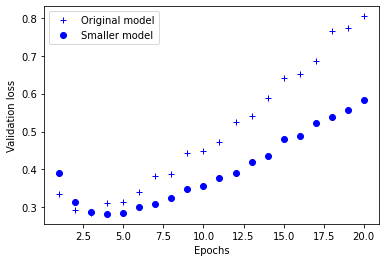

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [ ]:
# 더 큰 네트워크

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.9032 - acc: 0.6890 - val_loss: 0.2915 - val_acc: 0.8764
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2298 - acc: 0.9049 - val_loss: 0.3135 - val_acc: 0.8750
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1080 - acc: 0.9605 - val_loss: 0.4434 - val_acc: 0.8698
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0810 - acc: 0.9807 - val_loss: 0.4448 - val_acc: 0.8839
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0403 - acc: 0.9945 - val_loss: 0.4864 - val_acc: 0.8812
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6695 - val_acc: 0.8805
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 9.2299e-05 - acc: 1.0000 - val_loss: 0.9017 - val_acc: 0.8746
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1930

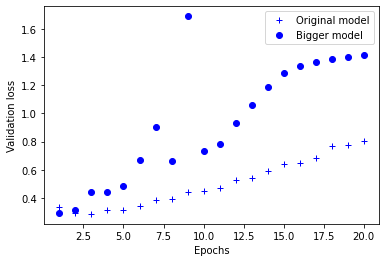

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

용량이 큰 네트워크는 첫번째 에포크 이후 바로 과대적합이 시작되어 갈수록 심해진다.

### 가중치 규제 추가
- L1 규제 : 가중치의 절대값에 비례하는 비용이 추가(가중치의 L1 노름)
- L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(가중치의 L2 노름) - 가중치 감쇠라고도 함.

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.5909 - acc: 0.7434 - val_loss: 0.3891 - val_acc: 0.8766
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3318 - acc: 0.9046 - val_loss: 0.3358 - val_acc: 0.8901
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2695 - acc: 0.9231 - val_loss: 0.3390 - val_acc: 0.8838
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2445 - acc: 0.9330 - val_loss: 0.3572 - val_acc: 0.8754
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2323 - acc: 0.9383 - val_loss: 0.3484 - val_acc: 0.8822
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2253 - acc: 0.9408 - val_loss: 0.3642 - val_acc: 0.8749
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2164 - acc: 0.9427 - val_loss: 0.3535 - val_acc: 0.8802
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2091 - a

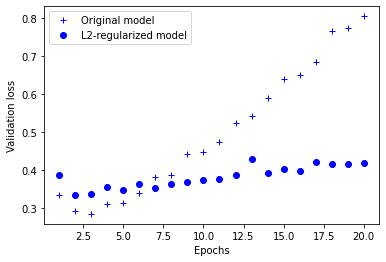

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()


두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델이 기본 모델 보다 훨씬 더 과대적합에 잘 견디고 있다.

In [ ]:
# L1 규제
1. l1(0.0001) 모델과 비교

In [6]:
from keras import regularizers

l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), 
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                         activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [7]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.6830 - acc: 0.7293 - val_loss: 0.4359 - val_acc: 0.8776
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3922 - acc: 0.8965 - val_loss: 0.3764 - val_acc: 0.8873
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3393 - acc: 0.9069 - val_loss: 0.3631 - val_acc: 0.8882
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3152 - acc: 0.9122 - val_loss: 0.3620 - val_acc: 0.8865
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3067 - acc: 0.9152 - val_loss: 0.3651 - val_acc: 0.8854
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2950 - acc: 0.9209 - val_loss: 0.3663 - val_acc: 0.8849
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2901 - acc: 0.9222 - val_loss: 0.3761 - val_acc: 0.8816
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2859 - a

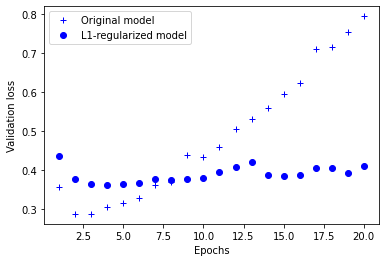

In [11]:
epochs = range(1,21)
l1_model_val_loss = l1_model_hist.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()


In [ ]:
# L1 과 L2 규제 병행
2. l1_l2(l1=0.0001, l2=0.0001) 모델과 비교

In [12]:
l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), 
                          activation='relu', input_shape=(10000,)))
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                         activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [13]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.6871 - acc: 0.7295 - val_loss: 0.4384 - val_acc: 0.8756
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3931 - acc: 0.8945 - val_loss: 0.3772 - val_acc: 0.8877
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3403 - acc: 0.9032 - val_loss: 0.3735 - val_acc: 0.8825
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3194 - acc: 0.9127 - val_loss: 0.3598 - val_acc: 0.8869
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3109 - acc: 0.9126 - val_loss: 0.3824 - val_acc: 0.8769
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3089 - acc: 0.9179 - val_loss: 0.3835 - val_acc: 0.8773
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2947 - acc: 0.9227 - val_loss: 0.3716 - val_acc: 0.8828
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2921 - a

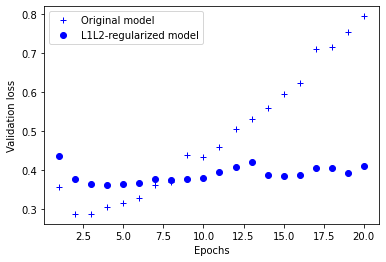

In [14]:
epochs = range(1,21)
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()


# 드롭아웃 추가
layer_output += np.random.randint(0, hight=2, size=layer_output.shape)
- 드롭아웃은 토론토 대학의 제프리 힌튼과 그의 학생들이 개발
- 네트워크의 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킨다(0으로 만듭니다.)
-

In [16]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.6417 - acc: 0.6108 - val_loss: 0.4462 - val_acc: 0.8566
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4734 - acc: 0.7879 - val_loss: 0.3418 - val_acc: 0.8802
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3754 - acc: 0.8492 - val_loss: 0.2991 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3225 - acc: 0.8805 - val_loss: 0.2797 - val_acc: 0.8896
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2850 - acc: 0.9007 - val_loss: 0.2804 - val_acc: 0.8899
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2509 - acc: 0.9134 - val_loss: 0.2879 - val_acc: 0.8851
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2223 - acc: 0.9269 - val_loss: 0.2950 - val_acc: 0.8860
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2077 - a

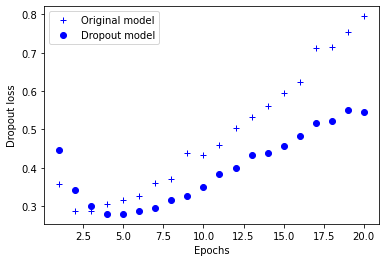

In [17]:
epochs = range(1,21)
dpt_model_val_loss = dpt_model_hist.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Dropout loss')
plt.legend()
plt.show()